# Principle Component Analysis (PCA)

In [1]:
import numpy as np
import pandas as pd

In [2]:
def readData(filename):
        data = pd.read_excel(filename)
        print("First 5 data: \n", data.head())
        print("Last 5 data: \n", data.tail())
        return data

In [25]:
def pcaPlot(pca):
    features = range(pca.n_components_)
    plt.bar(features, pca.explained_variance_ratio_, color="black")
    plt.xlabel('PCS features')
    plt.ylabel('variance %')
    plt.xticks(features) 

In [3]:
data = readData("hw_data_set.xlsx")

First 5 data: 
    ind_5  ind_6  ind_8      ind_9     ind_10     ind_12     ind_13  ind_14  \
0     19     17  100.0  85.714286  14.285714  72.363515  60.808814   23.80   
1     24     19  100.0  78.571429  21.428571  74.275883  64.366798   11.45   
2     30     24  100.0  71.428571  28.571429  75.140402  65.915803    8.75   
3     37     30  100.0  64.285714  35.714286  76.677846  68.584234    7.80   
4     41     37  100.0  57.142857  42.857143  81.603007  76.455495   14.90   

   ind_15  ind_16  ...  ind_416  ind_418  ind_420  ind_422  ind_424   ind_426  \
0   17.62   11.73  ...    -49.6      -54     -152     -353      1.0  0.498547   
1   18.16   12.22  ...    -55.6      -60     -158     -359      1.0  0.537088   
2   17.86   12.28  ...    -58.4      -60     -160     -362      1.0  0.615169   
3   14.76   12.61  ...    -61.8      -65     -166     -367      1.0  0.661517   
4   11.92   14.25  ...    -79.8      -86     -186     -388      1.0  0.747204   

    ind_428  20_target  50_t

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


In [6]:
data.isnull().values.any()
data.isnull().sum()

ind_5        0
ind_6        0
ind_8        0
ind_9        0
ind_10       0
            ..
ind_426      0
ind_428      0
20_target    0
50_target    0
90_target    0
Length: 136, dtype: int64

In [22]:
df = data.copy()
df = df.dropna()
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [23]:
# print("Numerical Data: ",data.select_dtypes(include=['float64','int64']))
print("Numerical Data: ",data.select_dtypes(include=['object']))

Numerical Data:       ind_109 ind_420 ind_422
0      GREEN    -152    -353
1      GREEN    -158    -359
2      GREEN    -160    -362
3      GREEN    -166    -367
4      GREEN    -186    -388
...      ...     ...     ...
6162     RED     -11    -270
6163     RED     -12    -271
6164   GREEN     -21    -280
6165   GREEN     -33    -292
6166   GREEN     -28    -288

[6167 rows x 3 columns]


In [9]:
# Dummy'e çevirme
dms = pd.get_dummies(data[['ind_109','ind_420','ind_422']])
dms.head()
y = data['90_target'] # hedef değişken

In [10]:
dms.head(2).T

,0,1
ind_109_GREEN,1,1
ind_109_RED,0,0
ind_420_-349,0,0
ind_420_-346,0,0
ind_420_-340,0,0
...,...,...
ind_422_117,0,0
ind_422_118,0,0
ind_422_119,0,0
ind_422_124,0,0


In [11]:
#hedef değişkeni ve kategorik değişkenleri veriden atıp geri kalanını floata dönüştürme
X_ = data.drop(['90_target','ind_109','ind_420','ind_422'], axis=1).astype("float64")
X_.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,20_target,50_target
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-27.0,0.002371,2.0,-49.6,-54.0,1.0,0.498547,0.701906,15.135802,35.625252
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-31.0,0.003074,0.8,-55.6,-60.0,1.0,0.537088,0.690833,15.143348,35.643013
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-30.0,0.003561,2.7,-58.4,-60.0,1.0,0.615169,0.693040,15.146870,35.651301
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-30.0,0.004366,0.9,-61.8,-65.0,1.0,0.661517,0.673418,15.153283,0.000000
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-45.0,0.004198,0.1,-79.8,-86.0,1.0,0.747204,0.700522,-15.179065,-35.727079


In [31]:
dms.astype("float64")

,ind_109_GREEN,ind_109_RED,ind_420_-349,ind_420_-346,ind_420_-340,ind_420_-330,ind_420_-327,ind_420_-326,ind_420_-323,ind_420_-322,...,ind_422_111,ind_422_112,ind_422_113,ind_422_114,ind_422_115,ind_422_117,ind_422_118,ind_422_119,ind_422_124,ind_422_?
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6163,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6164,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6165,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
dms

,ind_109_GREEN,ind_109_RED,ind_420_-349,ind_420_-346,ind_420_-340,ind_420_-330,ind_420_-327,ind_420_-326,ind_420_-323,ind_420_-322,...,ind_422_111,ind_422_112,ind_422_113,ind_422_114,ind_422_115,ind_422_117,ind_422_118,ind_422_119,ind_422_124,ind_422_?
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6163,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6164,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6165,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X = pd.concat([X_, dms],axis=1)
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_422_111,ind_422_112,ind_422_113,ind_422_114,ind_422_115,ind_422_117,ind_422_118,ind_422_119,ind_422_124,ind_422_?
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,0,0,0,0,0,0,0,0,0,0
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0,0,0,0,0,0,0,0,0,0
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,0,0,0,0,0,0,0,0,0,0
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0,0,0,0,0,0,0,0,0,0
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
training = data.copy()
print("training",training.shape)

training (6167, 136)


### Import PCA

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [13]:
pca = PCA()

In [21]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_train[0:1,:]

array([[ 8.63870024e+00, -5.22783869e+00,  1.53541502e+00, ...,
        -5.55166042e-16, -9.55433363e-17,  8.37268231e-17]])

In [22]:
#PCA yapılan datanın içinden, her bir componuntta datanın ne akdar açıklandığını kümülatif olarak gösterme.
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 3.95,  5.31,  6.  , ..., 99.97, 99.97, 99.97])

In [23]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 3.95,  5.31,  6.  , ..., 99.97, 99.97, 99.97])

In [24]:
import matplotlib.pyplot as plt

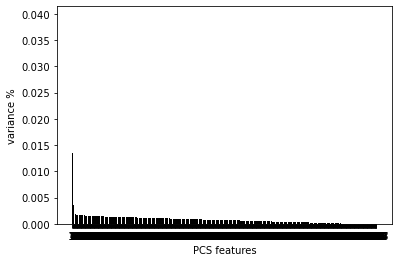

In [26]:
pcaPlot(pca)

In [28]:
pca = PCA(n_components=5)
X_reduced_train = pca.fit_transform(scale(X_train))

In [29]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)

In [30]:
pcr_model.intercept_

-3.2848564454508122

In [31]:
pcr_model.coef_

array([-0.28527131,  0.47463711,  1.08716922,  1.4368771 , -0.92306208])

In [59]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([ -1.57378663,  -6.51323132, -10.08608323,  -7.93058846,
        -8.20263514])

In [60]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_train, y_pred))

36.38270043054007

In [61]:
df["90_target"].mean()

-3.315072358419006

Text(0, 0.5, 'PCA 2')

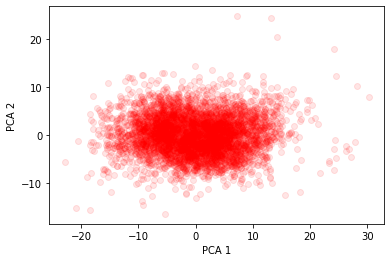

In [84]:
X_reduced_train = pca.fit_transform(scale(X_train))
PCA_components = pd.DataFrame(X_reduced_train)
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color="red")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [71]:
pca_1 = PCA(n_components=20)
X_reduced_train_1 = pca_1.fit_transform(scale(X_train))

from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
pcr_model1 = lm1.fit(X_reduced_train, y_train)

In [76]:
y_pred = pcr_model1.predict(X_reduced_train)
y_pred[0:20]

array([ -1.54548794,  -6.52462591, -10.08289615,  -7.94491492,
        -8.20847557,  -6.12475435,  -9.57021079,   3.53735312,
        -4.60548783,  11.57747335,   6.04040307,  -2.45944774,
         1.70339355,  -3.14449865,  -8.22179032,  -0.79608723,
        -0.39676414,   8.32989382,  -2.68320045,  -5.10340925])

In [74]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_train, y_pred))

36.38268890224352

In [78]:
pca_1 = PCA(n_components=50)
X_reduced_train_1 = pca_1.fit_transform(scale(X_train))

from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
pcr_model1 = lm1.fit(X_reduced_train, y_train)

In [79]:
y_pred = pcr_model1.predict(X_reduced_train)
y_pred[0:20]

array([ -1.41484052,  -6.62386528, -10.05054853,  -8.13215224,
        -8.33181143,  -6.05097765,  -9.61154842,   3.65447846,
        -4.47961069,  11.56720003,   6.20375009,  -2.44623181,
         1.7206439 ,  -3.07617935,  -8.1726538 ,  -0.76623339,
        -0.28254406,   8.32865501,  -2.71029934,  -5.08496148])

In [80]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_train, y_pred))

36.3768718764694

In [81]:
pca_1 = PCA(n_components=100)
X_reduced_train_1 = pca_1.fit_transform(scale(X_train))

from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
pcr_model1 = lm1.fit(X_reduced_train, y_train)

In [82]:
y_pred = pcr_model1.predict(X_reduced_train)
y_pred[0:20]

array([ -1.41484052,  -6.62386528, -10.05054853,  -8.13215224,
        -8.33181143,  -6.05097765,  -9.61154842,   3.65447846,
        -4.47961069,  11.56720003,   6.20375009,  -2.44623181,
         1.7206439 ,  -3.07617935,  -8.1726538 ,  -0.76623339,
        -0.28254406,   8.32865501,  -2.71029934,  -5.08496148])

In [83]:
from sklearn.metrics import mean_squared_error, r2_score
np.sqrt(mean_squared_error(y_train, y_pred))

36.3768718764694